In [1]:
# Import required system
import sys
sys.path.append('/Users/hoto7260/Jacob_LIET2/LIET/liet')

# general
import matplotlib.pyplot as plt
import numpy as np
try:
    np.distutils.__config__.blas_opt_info = np.distutils.__config__.blas_ilp64_opt_info
except Exception:
    pass
import pandas as pd
from scipy.stats import pearsonr
import plotly.express as px

# my modules
from liet_res_class import FitParse
import plotting_funcs as pf
import analysis_funcs as af

# setting plotting paramaters
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
rcParams['font.size'] = 15
#plt.rcParams.update({'font.size': 22})

# Finding which samples would be best to combine to assess TPM impact on model shape production
In order to determine what number of TPM is required in order for LIET to produce a model, we can concatenate runs and subsample to see at what point the model shape is lost.

## 1. Find best data for subsampling
I can either use data that is high in count but has a quality score of 2, slightly lower counts with a quality score of 1, or concatenate two files with quality scores of 1. For the latter, the runs must be similar otherwise the concatenation may lead to different shapes based on which reads are subsampled.

Since BAM files seem to have headers, it might be easier to just use an already large file. If we also want to consider saturation of model, it might be better to do large file, otherwise just stick with initial.
My options:
- **Beckerdorff2020human HeLa: SRR8478992 104 (1)** (Single)
- Beckerdorff2020human HeLa: SRR8478996 136 (2) (Single)
- G401: SRR6498832 126 (2)
- HCT116: SRR8304731 132 (2)
- Kbm7: SRR10354624 78 (1) & SRR10354625 67 (1)
- SRZ10354610 77 (1) & SRZ10354610 80 (1)

## 2. Subsample bam files & run on LIET
1. Can be done using samtools view -bs seedint.decimal% > subsampled.bam
- Can do 20% 
- convert bams to bedgraphs & run on LIET using hermit genes
- make bash file turning these bams into bedgraphs on LIET_Nextflow


- posterior widths with mL_stdev (more coverage)
- posterior stdev of oT (termination peak width) 
- posterior means of mT 

## 3. Load in Data

In [2]:
# 1%
log_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp01.hela.1030.liet.log"
res_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp01.hela.1030.liet"
subsamp01 = pf.FitParse(res_file=res_file, log_file=log_file)
# 5%
log_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp05.hela.1030.liet.log"
res_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp05.hela.1030.liet"
subsamp05 = pf.FitParse(res_file=res_file, log_file=log_file)
# 20%
log_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp20.hela.1030.liet.log"
res_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp20.hela.1030.liet"
subsamp20 = pf.FitParse(res_file=res_file, log_file=log_file)
# 40%
log_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp40.hela.1030.liet.log"
res_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp40.hela.1030.liet"
subsamp40 = pf.FitParse(res_file=res_file, log_file=log_file)
# 60%
log_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp60.hela.1030.liet.log"
res_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp60.hela.1030.liet"
subsamp60 = pf.FitParse(res_file=res_file, log_file=log_file)
# 80%
# log_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp80.hela.1030.liet.log"
# res_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp80.hela.1030.liet"
# subsamp80 = pf.FitParse(res_file=res_file, log_file=log_file)
# 100%
log_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp100.hela.1030.liet.log"
res_file = "/scratch/Users/hoto7260/batch_out_files/celltype/subsamp/subsamp100.hela.1030.liet"
subsamp100 = pf.FitParse(res_file=res_file, log_file=log_file)

CHECK LINE: ['NUCKS1: model error']
CHECK LINE: ['KCNMB4: model error']
CHECK LINE: ['FBXO33: model error']
CHECK LINE: ['TTC9: model error']
CHECK LINE: ['IRX3: model error']
CHECK LINE: ['PTRF: model error']
CHECK LINE: ['ALPK2: model error']
CHECK LINE: ['PI3: fitting error']


I cannot compare gene counts with coverage since 100% had the full 363 genes while the rest had the truncated 99 genes.

## 4. Put all data into combined dataframe after filtering

In [4]:
# Filter for wB_mean < 0.6
#df_list = [subsamp20.df, subsamp40.df, subsamp60.df, subsamp80.df, subsamp100.df]
df_list = [subsamp01.df, subsamp05.df, subsamp20.df, 
           subsamp40.df, subsamp60.df, subsamp100.df]
# [subsamp20_f_df, subsamp40_f_df, 
#  subsamp60_f_df, subsamp80_f_df, 
#  subsamp100_f_df] = af.filter_dfs(df_list, col='w_B_mean',
#                                   value=0.6, comparison='<')
[subsamp01_f_df, subsamp05_f_df, 
 subsamp20_f_df, subsamp40_f_df, 
 subsamp60_f_df,  subsamp100_f_df] = af.filter_dfs(df_list, col='w_B_mean',
                                  value=1, comparison='<')
print('# genes before & after w_B filtered for 1%', len(subsamp01.df.index),len(subsamp01_f_df.index))
print('# genes before & after w_B filtered for 5%', len(subsamp05.df.index),len(subsamp05_f_df.index))
print('# genes before & after w_B filtered for 20%', len(subsamp20.df.index),len(subsamp20_f_df.index))
print('# genes before & after w_B filtered for 40%', len(subsamp40.df.index),len(subsamp40_f_df.index))
print('# genes before & after w_B filtered for 60%', len(subsamp60.df.index),len(subsamp60_f_df.index))
#print('# genes before & after w_B filtered for 80%', len(subsamp80.df.index),len(subsamp80_f_df.index))
print('# genes before & after w_B filtered for 100%',len(subsamp100.df.index),len(subsamp100_f_df.index))

# genes before & after w_B filtered for 1% 42 42
# genes before & after w_B filtered for 5% 56 56
# genes before & after w_B filtered for 20% 65 65
# genes before & after w_B filtered for 40% 66 66
# genes before & after w_B filtered for 60% 67 67
# genes before & after w_B filtered for 100% 197 197


In [5]:

# Get coverage based on strands
subsamp01_f_df = af.getcov(subsamp01_f_df)
subsamp05_f_df = af.getcov(subsamp05_f_df)
subsamp20_f_df = af.getcov(subsamp20_f_df)
subsamp40_f_df = af.getcov(subsamp40_f_df)
subsamp60_f_df = af.getcov(subsamp60_f_df)
subsamp100_f_df = af.getcov(subsamp100_f_df)

# combine into dataframe
col_list = ['mT_mean', 'mT_stdev', 'mL_mean', 'mL_stdev', 'cov', 'w_B_mean']
df_list = [subsamp01_f_df, subsamp05_f_df, 
 subsamp20_f_df, subsamp40_f_df, 
 subsamp60_f_df,  subsamp100_f_df]
name_list = ['k562 1%', 'k562 5%','k562 20%', 'k562 40%','k562 60%',
             'k562 100%']
ALL_full_df = af.df_combiner(col_list, df_list, name_list)

# dropped ACTC1 because it had ridiculously high stdev in ALL samples
ALL_full_df = ALL_full_df.drop('ACTC1')


After merging k562 5%, # genes= 42
After merging k562 20%, # genes= 42
After merging k562 40%, # genes= 42
After merging k562 60%, # genes= 42
After merging k562 100%, # genes= 42
After merging k562 5%, # genes= 42
After merging k562 20%, # genes= 42
After merging k562 40%, # genes= 42
After merging k562 60%, # genes= 42
After merging k562 100%, # genes= 42
After merging k562 5%, # genes= 42
After merging k562 20%, # genes= 42
After merging k562 40%, # genes= 42
After merging k562 60%, # genes= 42
After merging k562 100%, # genes= 42
After merging k562 5%, # genes= 42
After merging k562 20%, # genes= 42
After merging k562 40%, # genes= 42
After merging k562 60%, # genes= 42
After merging k562 100%, # genes= 42
After merging k562 5%, # genes= 42
After merging k562 20%, # genes= 42
After merging k562 40%, # genes= 42
After merging k562 60%, # genes= 42
After merging k562 100%, # genes= 42
After merging k562 5%, # genes= 42
After merging k562 20%, # genes= 42
After merging k562 40%, # gen

## 5. BRIEF exploratory analysis (skip to 6 for actual data lol)
One would expect there to be a decrease in certainty of the posteriors based on a decrease in available data.

In [ ]:
# Make a scatter plot

mTm_df = ALL_full_df.filter(regex='mT_mean')
plt.fig = pd.plotting.scatter_matrix(mTm_df, diagonal='hist', figsize=(10,10) 
                                )
mTm_df = ALL_full_df.filter(regex='cov')
plt.fig = pd.plotting.scatter_matrix(mTm_df, diagonal='hist', figsize=(10,10))

plt.title('Scatter matrix of standard deviation of mL posterior',weight='bold')
mTs_df = ALL_full_df.filter(regex='mT_stdev')
pd.plotting.scatter_matrix(mTs_df, diagonal='hist', figsize=(10,10))
# mLm_df = ALL_full_df.filter(regex='mL_mean')
# pd.plotting.scatter_matrix(mLm_df, diagonal='hist')
# mLs_df = ALL_full_df.filter(regex='mL_stdev')
# pd.plotting.scatter_matrix(mLs_df, diagonal='hist')
# plt.title('Scatter matrix of standard deviation of mL posterior',weight='bold')

In [ ]:
print(ALL_full_df.columns)

In [8]:
# Exploratory with px
fig = px.scatter(ALL_full_df, x= 'k562 1%_mT_stdev', y='k562 100%_mT_stdev', 
                 color='k562 1%_cov',
                hover_data=['k562 100%_cov', 'gene', 'strand'])
fig.show()
fig = px.scatter(ALL_full_df, x= 'k562 1%_mT_mean', y='k562 100%_mT_mean', 
                 color='k562 1%_cov',
                hover_data=['k562 100%_cov', 'gene', 'strand','k562 100%_mT_stdev','k562 1%_mT_stdev', 
                            'k562 1%_mL_mean', 'k562 100%_mL_mean' ])
fig.show()

In [ ]:

rcParams['figure.figsize'] = 6, 5
ALL_full_df.plot.scatter('k562 1%_mT_mean', 'k562 100%_mT_mean', edgecolor='black', 
                       s=30, fontsize=10)
#calculate equation for trendline
z = np.polyfit(ALL_full_df['k562 1%_mT_mean'], ALL_full_df['k562 100%_mT_mean'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(ALL_full_df['k562 1%_mT_mean'], p(ALL_full_df['k562 1%_mT_mean']),
        color='black', linewidth=0.5)
plt.title('Comparing mT between 1% & 100%', weight='bold')


ALL_full_df.plot.scatter('k562 1%_mT_stdev', 'k562 100%_mT_stdev', 
                         c='k562 1%_cov', colormap='viridis', 
                       s=30, fontsize=10)
plt.title('Comparing mT uncertainty between 1% & 100%', weight='bold')
ALL_full_df.plot.scatter('k562 1%_mL_mean', 'k562 100%_mL_mean', 
                         c='k562 1%_cov', colormap='viridis', 
                       s=30, fontsize=10)
plt.title('Comparing mL between 1% & 100%', weight='bold')
ALL_full_df.plot.scatter('k562 1%_mL_stdev', 'k562 100%_mL_stdev', 
                         c='k562 1%_cov', colormap='viridis', 
                       s=30, fontsize=10)
plt.title('Comparing mL uncertainty between 1% & 100%', weight='bold')
ALL_full_df.plot.scatter('k562 1%_cov', 'k562 100%_cov', 
                       s=30, fontsize=10)
plt.title('Comparing coverage between 1% & 100%', weight='bold')

In [ ]:

rcParams['figure.figsize'] = 6, 5
ALL_full_df.plot.scatter('k562 1%_mT_mean', 'k562 100%_mT_mean', edgecolor='black', 
                       s=30, fontsize=10)
#calculate equation for trendline
z = np.polyfit(ALL_full_df['k562 1%_mT_mean'], ALL_full_df['k562 100%_mT_mean'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(ALL_full_df['k562 1%_mT_mean'], p(ALL_full_df['k562 1%_mT_mean']),
        color='black', linewidth=0.5)
plt.title('Comparing mT between 1% & 100%', weight='bold')


ALL_full_df.plot.scatter('k562 1%_mT_stdev', 'k562 100%_mT_stdev', 
                         c='k562 1%_cov', colormap='viridis', 
                       s=30, fontsize=10)
plt.title('Comparing mT uncertainty between 1% & 100%', weight='bold')
ALL_full_df.plot.scatter('k562 1%_mL_mean', 'k562 100%_mL_mean', 
                         c='k562 1%_cov', colormap='viridis', 
                       s=30, fontsize=10)
plt.title('Comparing mL between 1% & 100%', weight='bold')
ALL_full_df.plot.scatter('k562 1%_mL_stdev', 'k562 100%_mL_stdev', 
                         c='k562 1%_cov', colormap='viridis', 
                       s=30, fontsize=10)
plt.title('Comparing mL uncertainty between 1% & 100%', weight='bold')
ALL_full_df.plot.scatter('k562 1%_cov', 'k562 100%_cov', 
                       s=30, fontsize=10)
plt.title('Comparing coverage between 1% & 100%', weight='bold')

## 6a. Boxplot of coverage & mT to ensure actual decreaase

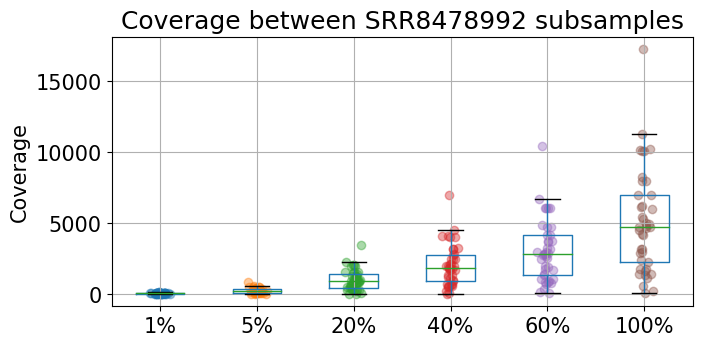

In [7]:
# removed 'ACTC1' since that had high stdev in all
datadict = {'1%': ALL_full_df['k562 1%_cov'], 
            '5%': ALL_full_df['k562 5%_cov'],
            '20%': ALL_full_df['k562 20%_cov'], 
            '40%': ALL_full_df['k562 40%_cov'], 
            '60%': ALL_full_df['k562 60%_cov'], 
            '100%': ALL_full_df['k562 100%_cov']}
title = "Coverage between SRR8478992 subsamples"
y_label = 'Coverage'
pf.box_plotter_all(datadict, title=title, y_label=y_label, showmeans=False)

## 6b. See how mT & mL uncertainty and means change with coverage

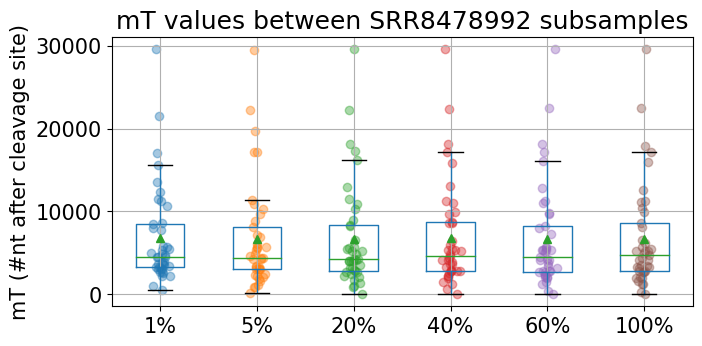

In [8]:
datadict = {'1%': ALL_full_df['k562 1%_mT_mean'], 
            '5%': ALL_full_df['k562 5%_mT_mean'],
            '20%': ALL_full_df['k562 20%_mT_mean'], 
            '40%': ALL_full_df['k562 40%_mT_mean'], 
            '60%': ALL_full_df['k562 60%_mT_mean'], 
            '100%': ALL_full_df['k562 100%_mT_mean']}
title = "mT values between SRR8478992 subsamples"
y_label = 'mT (#nt after cleavage site)'
pf.box_plotter_all(datadict, title=title, y_label=y_label, showmeans=True)

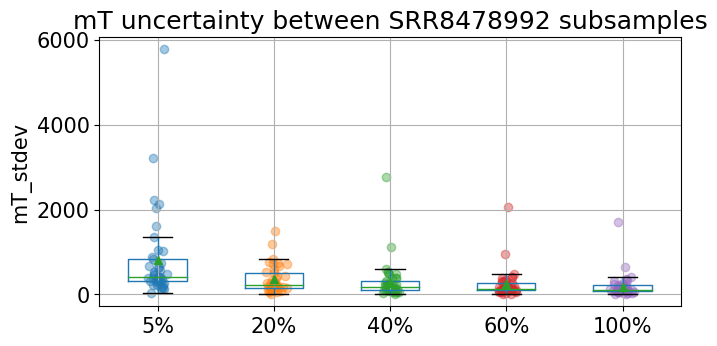

In [10]:
datadict = {'1%': ALL_full_df['k562 1%_mT_stdev'], 
            '5%': ALL_full_df['k562 5%_mT_stdev'],
            '20%': ALL_full_df['k562 20%_mT_stdev'], 
            '40%': ALL_full_df['k562 40%_mT_stdev'], 
            '60%': ALL_full_df['k562 60%_mT_stdev'], 
            '100%': ALL_full_df['k562 100%_mT_stdev']}
title = "mT uncertainty between SRR8478992 subsamples"
y_label = 'mT_stdev'
pf.box_plotter_all(datadict, title=title, y_label=y_label, showmeans=True)

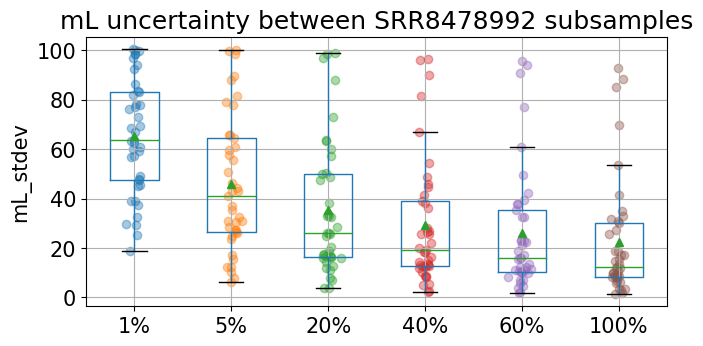

In [11]:
datadict = {'1%': ALL_full_df['k562 1%_mL_stdev'], 
            '5%': ALL_full_df['k562 5%_mL_stdev'],
            '20%': ALL_full_df['k562 20%_mL_stdev'], 
            '40%': ALL_full_df['k562 40%_mL_stdev'], 
            '60%': ALL_full_df['k562 60%_mL_stdev'], 
            '100%': ALL_full_df['k562 100%_mL_stdev']}
title = "mL uncertainty between SRR8478992 subsamples"
y_label = 'mL_stdev'
pf.box_plotter_all(datadict, title=title, y_label=y_label, showmeans=True)

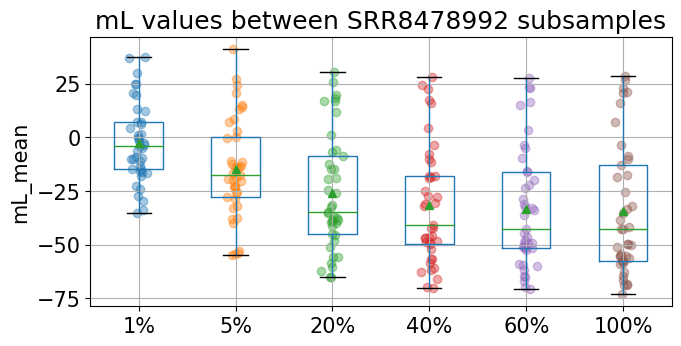

In [12]:
datadict = {'1%': ALL_full_df['k562 1%_mL_mean'], 
            '5%': ALL_full_df['k562 5%_mL_mean'],
            '20%': ALL_full_df['k562 20%_mL_mean'], 
            '40%': ALL_full_df['k562 40%_mL_mean'], 
            '60%': ALL_full_df['k562 60%_mL_mean'], 
            '100%': ALL_full_df['k562 100%_mL_mean']}
title = "mL values between SRR8478992 subsamples"
y_label = 'mL_mean'
pf.box_plotter_all(datadict, title=title, y_label=y_label, showmeans=True)

It seems there is no difference despite that seeming completely unrealistic. I'm wondering if the cache sharing might be messing up the calculations. Therefore, I will retry with 3.9.5 to see if that might explain the problem.

## 6. See how weights of background compare